In [1]:
import pandas as pd

In [264]:
df_energy_data = pd.read_csv('./data/london_energy.csv',  parse_dates=['Date'])
df_energy_data.head()

,LCLid,Date,KWH
0,MAC000002,2012-10-12,7.098
1,MAC000002,2012-10-13,11.087
2,MAC000002,2012-10-14,13.223
3,MAC000002,2012-10-15,10.257
4,MAC000002,2012-10-16,9.769


In [265]:
df_energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   LCLid   object        
 1   Date    datetime64[ns]
 2   KWH     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 80.3+ MB


In [266]:
df_energy_data.describe()

,Date,KWH
count,3510433,3.510433e+06
mean,2013-03-27 21:09:43.463406848,1.013001e+01
min,2011-11-23 00:00:00,0.000000e+00
25%,2012-10-21 00:00:00,4.685000e+00
50%,2013-03-30 00:00:00,7.819000e+00
75%,2013-09-10 00:00:00,1.257600e+01
max,2014-02-28 00:00:00,3.325560e+02
std,NaN,9.134486e+00


In [267]:
df_energy_data.LCLid.value_counts()

LCLid
MAC000153    829
MAC000145    829
MAC000155    829
MAC000152    829
MAC000149    829
            ... 
MAC005560      1
MAC005563      1
MAC005559      1
MAC001150      1
MAC005556      1
Name: count, Length: 5566, dtype: int64

In [268]:
date_range = pd.date_range('2012-01-01', '2013-12-31')
date_range

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2013-12-22', '2013-12-23', '2013-12-24', '2013-12-25',
               '2013-12-26', '2013-12-27', '2013-12-28', '2013-12-29',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', length=731, freq='D')

In [269]:
df_energy = df_energy_data.loc[df_energy_data.Date.isin(date_range)]
df_energy

,LCLid,Date,KWH
0,MAC000002,2012-10-12,7.098
1,MAC000002,2012-10-13,11.087
2,MAC000002,2012-10-14,13.223
3,MAC000002,2012-10-15,10.257
4,MAC000002,2012-10-16,9.769
...,...,...,...
3510369,MAC005567,2013-12-27,9.548
3510370,MAC005567,2013-12-28,7.379
3510371,MAC005567,2013-12-29,8.716
3510372,MAC005567,2013-12-30,4.370


In [270]:
a = df_energy.groupby('LCLid').agg({'Date':'count'}).loc[lambda x: x.Date == 731]
a.index

Index(['MAC000015', 'MAC000017', 'MAC000018', 'MAC000019', 'MAC000020',
       'MAC000021', 'MAC000022', 'MAC000023', 'MAC000024', 'MAC000025',
       ...
       'MAC004859', 'MAC004860', 'MAC004861', 'MAC004862', 'MAC004863',
       'MAC004864', 'MAC004865', 'MAC004866', 'MAC004867', 'MAC005555'],
      dtype='object', name='LCLid', length=355)

In [271]:
df_energy_new = df_energy.loc[df_energy.LCLid.isin(a.index)]
df_energy_new

,LCLid,Date,KWH
7579,MAC000015,2012-01-01,6.327
7580,MAC000015,2012-01-02,6.601
7581,MAC000015,2012-01-03,11.619
7582,MAC000015,2012-01-04,7.023
7583,MAC000015,2012-01-05,11.355
...,...,...,...
3506782,MAC005555,2013-12-27,5.816
3506783,MAC005555,2013-12-28,7.186
3506784,MAC005555,2013-12-29,9.684
3506785,MAC005555,2013-12-30,6.667


In [281]:
df_energy_new.loc[df_energy_new.KWH == 0]

,LCLid,Date,KWH


In [280]:

df_energy_new.KWH = df_energy_new.KWH.replace(to_replace=0, value=np.nan)


/var/folders/wp/qtpm72194czff6rn4dry0c7c0000gn/T/ipykernel_2213/2187755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy_new.KWH = df_energy_new.KWH.replace(to_replace=0, value=np.nan)


In [291]:
df_energy_new.loc[df_energy_new.KWH.isna()]

,LCLid,Date,KWH


In [290]:
df_energy_new.KWH = df_energy_new.KWH.ffill()

/var/folders/wp/qtpm72194czff6rn4dry0c7c0000gn/T/ipykernel_2213/2166205604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy_new.KWH = df_energy_new.KWH.ffill()


In [293]:
df_energy_new.describe()

,Date,KWH
count,259505,259505.000000
mean,2012-12-31 00:00:00,10.547885
min,2012-01-01 00:00:00,0.001000
25%,2012-07-01 00:00:00,5.105000
50%,2012-12-31 00:00:00,8.322000
75%,2013-07-02 00:00:00,13.151000
max,2013-12-31 00:00:00,132.983000
std,NaN,8.450990


In [295]:
df_energy_pivot = df_energy_new.pivot(index='Date', columns='LCLid', values='KWH')
df_energy_pivot

LCLid,MAC000015,MAC000017,MAC000018,MAC000019,MAC000020,MAC000021,MAC000022,MAC000023,MAC000024,MAC000025,...,MAC004859,MAC004860,MAC004861,MAC004862,MAC004863,MAC004864,MAC004865,MAC004866,MAC004867,MAC005555
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,6.327,5.635,7.875,6.594,14.949,27.095,11.201,21.654,36.755,4.885,...,17.484,4.283,4.705,8.415,13.073,7.898,12.773,18.257,5.520,6.649
2012-01-02,6.601,6.863,11.055,8.652,7.643,22.197,11.498,20.954,26.922,4.416,...,16.122,3.945,4.234,7.107,12.953,7.277,15.264,17.669,6.048,5.357
2012-01-03,11.619,8.071,10.776,7.395,9.255,23.856,11.870,27.342,25.398,4.729,...,14.158,4.074,16.801,6.693,12.646,5.517,24.623,18.412,5.295,8.151
2012-01-04,7.023,8.738,15.515,7.928,8.263,19.151,11.487,25.471,28.373,4.776,...,12.089,4.076,21.169,6.275,10.878,9.277,33.262,17.383,7.242,9.243
2012-01-05,11.355,6.216,17.494,8.911,10.553,18.791,13.962,24.457,32.534,4.951,...,14.908,4.163,16.815,7.570,13.635,8.393,34.445,19.575,4.626,5.713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,8.116,7.081,12.719,3.786,7.325,18.709,21.406,5.065,28.859,5.500,...,13.663,2.661,1.425,18.999,1.626,5.575,2.304,21.227,6.915,5.816
2013-12-28,7.339,5.896,12.733,8.244,13.079,19.602,21.906,13.540,33.172,4.831,...,13.266,2.733,1.432,13.783,1.618,6.481,13.176,21.140,6.258,7.186
2013-12-29,12.964,9.060,15.095,8.972,7.580,19.754,21.002,17.292,18.735,6.134,...,7.746,3.330,1.381,10.369,11.099,8.400,25.134,18.668,6.909,9.684


In [234]:
bbbb.MAC000015.min(axis= 0)

4.242

In [169]:
bbbb.MAC000015.max(axis= 0)

35.279

In [170]:
bbbb.MAC000015.mean(axis= 0)

10.8137756497948

In [177]:
bbbb[bbbb.index == '2012-01-01'].mean(axis= 1)

Date
2012-01-01    12.400003
dtype: float64

In [229]:
bbbb.loc[:, ['MAC000015' , 'MAC000017']]

LCLid,MAC000015,MAC000017
Date,,
2012-01-01,6.327,5.635
2012-01-02,6.601,6.863
2012-01-03,11.619,8.071
2012-01-04,7.023,8.738
2012-01-05,11.355,6.216
...,...,...
2013-12-27,8.116,7.081
2013-12-28,7.339,5.896
2013-12-29,12.964,9.060


In [321]:
data = df_energy_pivot.loc[ '2012-01-01':'2013-12-31', ['MAC000015', 'MAC000017', 'MAC000018', 'MAC000019', 'MAC000020'] ]


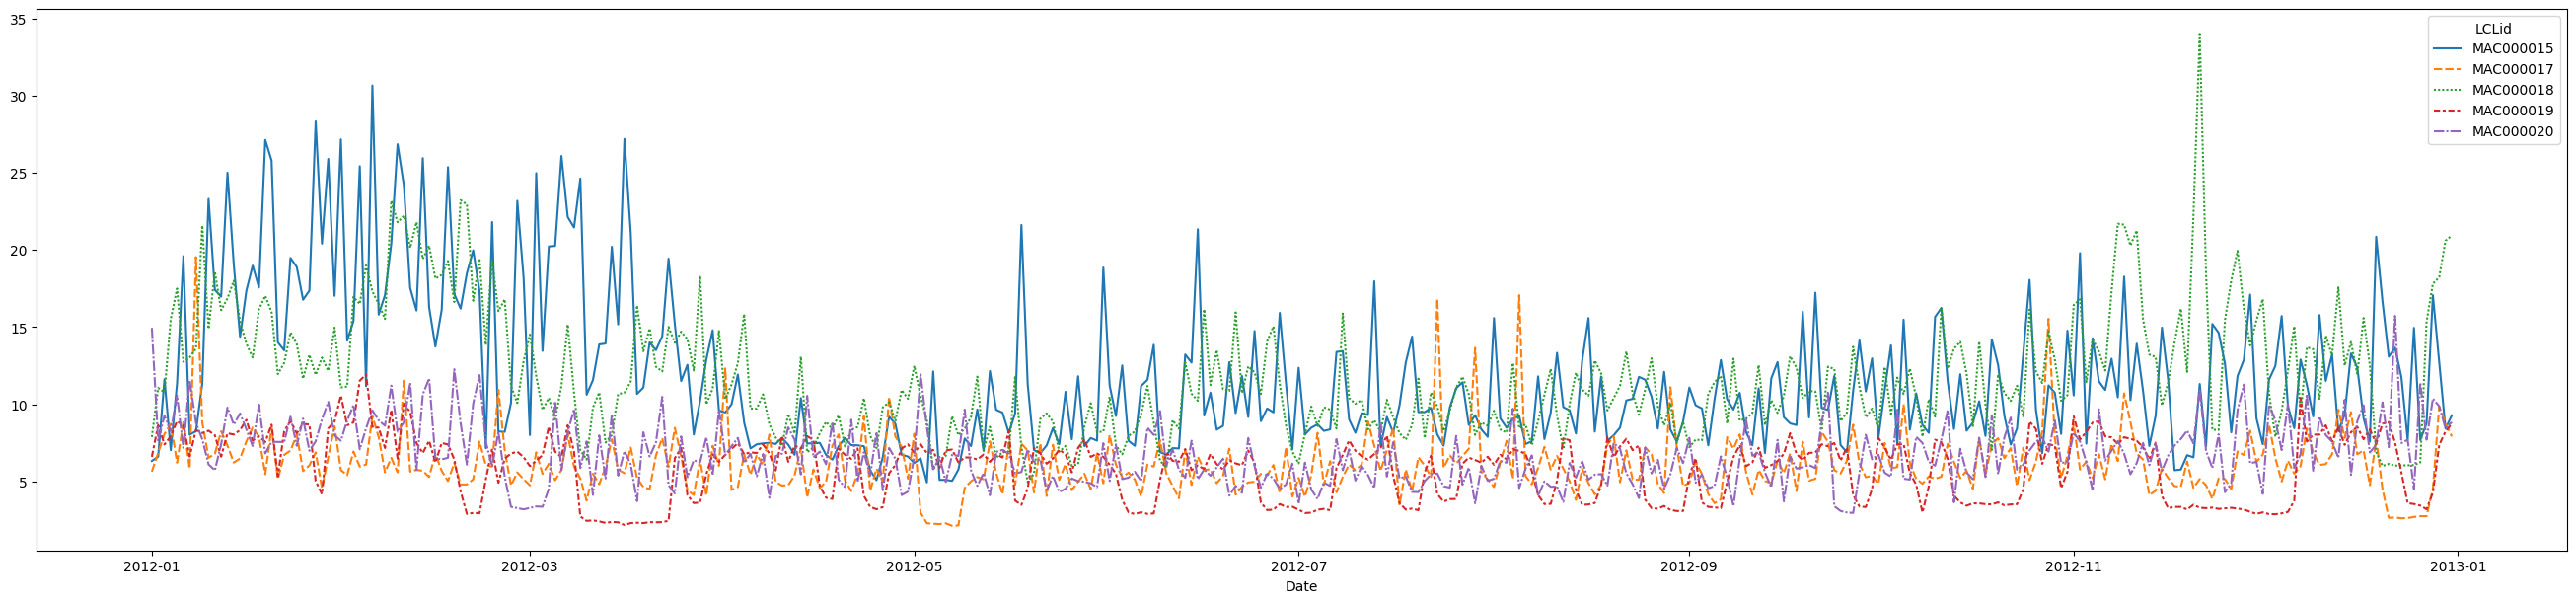

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1) = fig.subplots(1,1)

sns.lineplot( data =data , ax= ax1)
plt.show()

In [368]:
train_id = []
valid_id = []
test_id = []


for i, LCLid in enumerate(a.index):
    if i < 300:
        train_id.append(LCLid)
    elif i >= 300 and i < 330:
        valid_id.append(LCLid)
    else:
        test_id.append(LCLid)

print(f'train_id:{len(train_id)},valid_id:{len(valid_id)}, test_id:{len(test_id)} ')

train_id:300,valid_id:30, test_id:25 


In [369]:
train_data = df_energy_pivot.loc[ :, train_id ]
valid_data = df_energy_pivot.loc[ :, valid_id ]
test_data = df_energy_pivot.loc[ :, test_id ]

In [370]:
train_data['MEAN'] = train_data.mean(axis= 1)
train_data['MAX'] = train_data.max(axis= 1)
train_data['MIN']  = train_data.min(axis= 1)
train_data = train_data.drop(columns = train_id)
train_data

LCLid,MEAN,MAX,MIN
Date,,,
2012-01-01,12.506550,60.159,0.018
2012-01-02,12.939590,65.824,0.018
2012-01-03,12.874470,64.652,0.464
2012-01-04,12.731107,68.020,0.717
2012-01-05,12.792297,63.598,0.717
...,...,...,...
2013-12-27,12.164863,64.658,0.011
2013-12-28,11.694570,52.527,0.011
2013-12-29,12.249580,62.881,0.011


In [371]:
valid_data['MEAN'] = valid_data.mean(axis= 1)
valid_data['MAX'] = valid_data.max(axis= 1)
valid_data['MIN']  = valid_data.min(axis= 1)
valid_data = valid_data.drop(columns = valid_id)
valid_data

LCLid,MEAN,MAX,MIN
Date,,,
2012-01-01,13.668400,42.998,1.732
2012-01-02,13.012767,40.583,2.543
2012-01-03,14.219267,42.843,1.848
2012-01-04,14.450900,47.007,2.615
2012-01-05,14.360267,48.555,1.765
...,...,...,...
2013-12-27,12.724067,34.881,1.293
2013-12-28,13.213900,54.554,1.121
2013-12-29,14.836567,52.552,1.492


In [372]:
test_data['MEAN'] = test_data.mean(axis= 1)
test_data['MAX'] = test_data.max(axis= 1)
test_data['MIN']  = test_data.min(axis= 1)
test_data = test_data.drop(columns = test_id)
test_data

LCLid,MEAN,MAX,MIN
Date,,,
2012-01-01,10.46328,21.949,2.747
2012-01-02,10.44124,29.753,3.857
2012-01-03,10.67308,27.748,3.126
2012-01-04,10.82584,33.262,3.085
2012-01-05,12.05152,34.445,3.173
...,...,...,...
2013-12-27,8.78784,35.882,1.425
2013-12-28,11.84024,72.353,1.432
2013-12-29,12.60660,57.111,1.381


In [373]:
train_data.to_csv('./data/london_energy_train.csv')
valid_data.to_csv('./data/london_energy_valid.csv')
test_data.to_csv('./data/london_energy_test.csv')